<a href="https://colab.research.google.com/github/tkmaroon/use-cases-of-universal-sentence-encoder/blob/master/sentence_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentence similarity with Universal Sentence Encoder
## Overview
This notebook demonstrates to calculate sentence similarities using the Universal Sentence Encoder published on Tensorflow Hub.


## Settings

In [0]:
#@title Setup Environment
!pip install --quiet tensorflow==1.14.0
!pip install --quiet tensorflow_hub==0.5.0
!pip install --quiet tf_sentencepiece==0.1.82.1
!pip install --quiet googletrans==2.4.0
!pip install --quiet japanize-matplotlib==1.0.4

In [0]:
#@title Setup common imports and functions
import tensorflow as tf
import tensorflow_hub as hub
import tf_sentencepiece
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
from googletrans import Translator
import operator
from functools import reduce


def visualize_similarity(embeds_1, embeds_2, labels_1, labels_2, plot_title):
    corr = np.inner(embeds_1, embeds_2)
    chart = sns.heatmap(
        corr,
        xticklabels=labels_1,
        yticklabels=labels_2,
        vmin=0,
        vmax=1,
        cmap='YlOrRd'
    )
    chart.set_yticklabels(chart.get_yticklabels(), rotation=0)
    chart.set_title(plot_title)

W0717 08:45:45.259178 140015194711936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/tf_sentencepiece/sentencepiece_processor_ops.py:259: The name tf.NotDifferentiable is deprecated. Please use tf.no_gradient instead.



## Visualizing sentence similarity

In [0]:
#@title Select sentence encoder
encoder = 'universal-sentence-encoder-multilingual' #@param ["universal-sentence-encoder-multilingual", "multilingual-large", "universal-sentence-encoder-xling-many"]

if encoder == 'universal-sentence-encoder-xling-many':
    module_url = "https://tfhub.dev/google/universal-sentence-encoder-xling-many/1"
elif encoder == 'universal-sentence-encoder-multilingual':
    module_url = 'https://tfhub.dev/google/universal-sentence-encoder-multilingual/1'
elif encoder == 'universal-sentence-encoder-multilingual-large':
    module_url = 'https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/1'

In [0]:
g = tf.Graph()
with g.as_default():
    text_input = tf.placeholder(dtype=tf.string, shape=[None])
    xling_embed = hub.Module(module_url)
    embedded_text = xling_embed(text_input)
    init_options = tf.group([tf.global_variables_initializer(), tf.tables_initializer()])
g.finalize()

# Initialize session
session = tf.Session(graph=g)
session.run(init_options)

In [0]:
ja_sents = [
    "今日はいい天気ですね。",
    "明日晴れたら、公園にいきましょう。",
    "最近、梅雨があけましたね。",
    "次の会議のための資料作成を手伝ってくれますか。",
    "私たちは打ち合わせをするために、その書店の前で会いました。",
    "契約書を2部添付いたしました。",
]

In [0]:
# Translate Japanese to English and German
translator = Translator()
en_sents = [s.text for s in translator.translate(ja_sents, src='ja', dest='en')]
input_sents = reduce(operator.add, zip(ja_sents, en_sents))

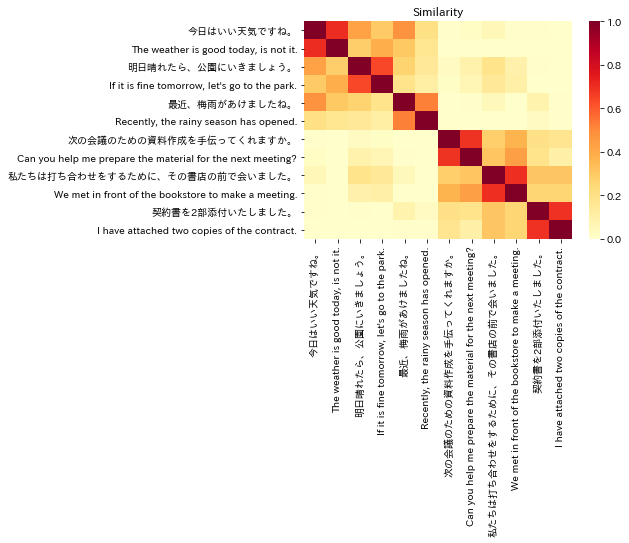

In [0]:
embed_result = session.run(embedded_text, feed_dict={text_input: input_sents})
visualize_similarity(embed_result, embed_result, input_sents, input_sents, 'Similarity')

## References
1. [M. Chidambaram, Y. Yang, D. Cer, S. Yuan, Y.-H. Sung, B. Strope, and R. Kurzweil. Learning Cross-Lingual Sentence Representations via a Multi-task Dual-Encoder Model. ArXiv e-prints](https://arxiv.org/pdf/1810.12836.pdf)